In [1]:
%matplotlib inline

from collections import defaultdict
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


In [2]:
data_files = [
    "data/DM-40492/apdb-usdf-cass0-20230822T211752.csv.gz",
    "data/DM-40492/apdb-usdf-cass0-20230824T161406.csv.gz",
    "data/DM-40492/apdb-usdf-cass0-20230824T212845.csv.gz",
    "data/DM-40492/apdb-usdf-cass0-20230825T205941.csv.gz",
    "data/DM-40492/apdb-usdf-cass0-20230826T182917.csv.gz",
    "data/DM-40492/apdb-usdf-cass0-20230827T091727.csv.gz",
    "data/DM-40492/apdb-usdf-cass0-20230827T181428.csv.gz",
]

In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]
for i, frame in enumerate(frames):
    frame["test"] = i + 1

In [4]:
df_cass = pd.concat(frames)


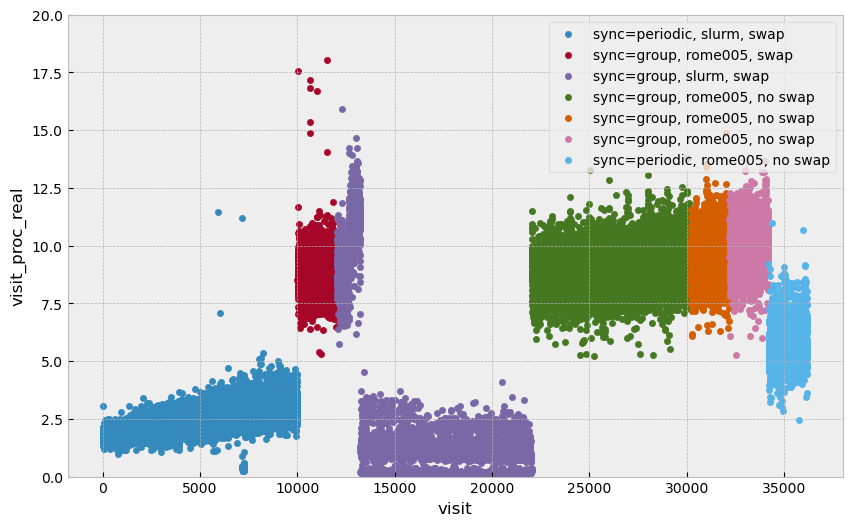

In [5]:
labels = [
    "sync=periodic, slurm, swap",
    "sync=group, rome005, swap",
    "sync=group, slurm, swap",
    "sync=group, rome005, no swap",
    "sync=group, rome005, no swap",
    "sync=group, rome005, no swap",
    "sync=periodic, rome005, no swap",
]    

ax = None
for i, df in enumerate(frames):
    ax = df.reset_index().plot.scatter(x="visit", y="visit_proc_real", ylim=(0., 20.), ax=ax, color=f"C{i}", label=labels[i], figsize=(10, 6))

Test with out insert_id and not filling random data, to compare with the GCP test. The difference with GCP is that this test was done with `commitlog_sync=batch`

In [6]:
data_files = [
    "data/DM-40492/apdb-usdf-cass4-20230913T172858.csv.gz",
    "data/DM-40492/apdb-usdf-cass4-20230914T155306.csv.gz",
    "data/DM-40492/apdb-usdf-cass4-20230915T171642.csv.gz",
]

In [7]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]

In [15]:
df = pd.concat(frames)
# strip visits that did not measure read time
df = df[(df.index % 1000) < 100]
# exclude period with MPI problems
df = df[(df.index < 24083) | (df.index > 24902)]

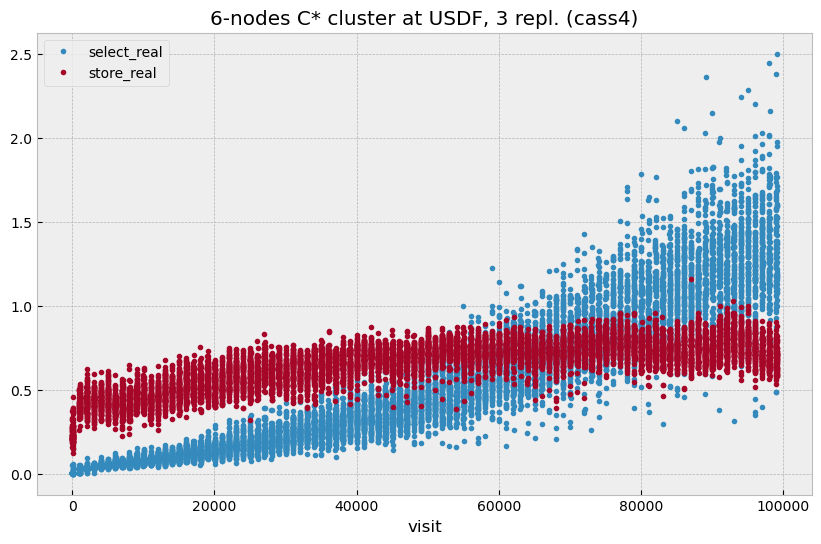

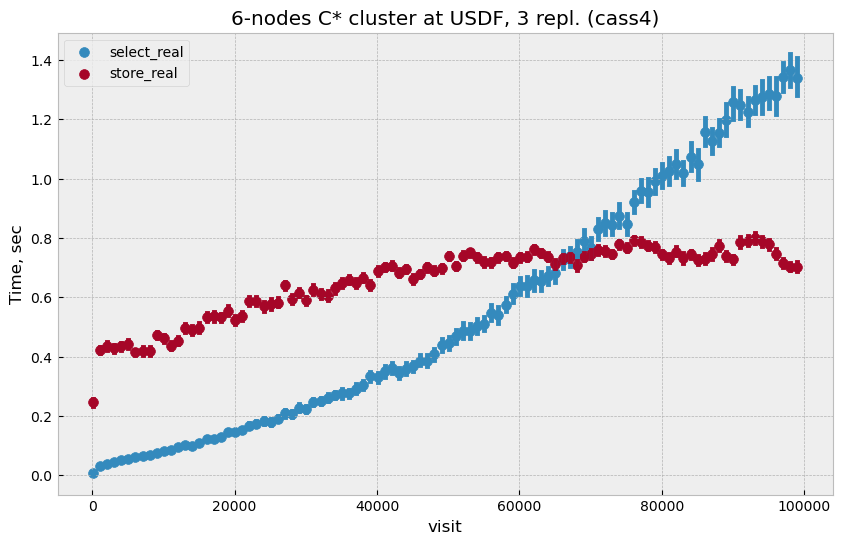

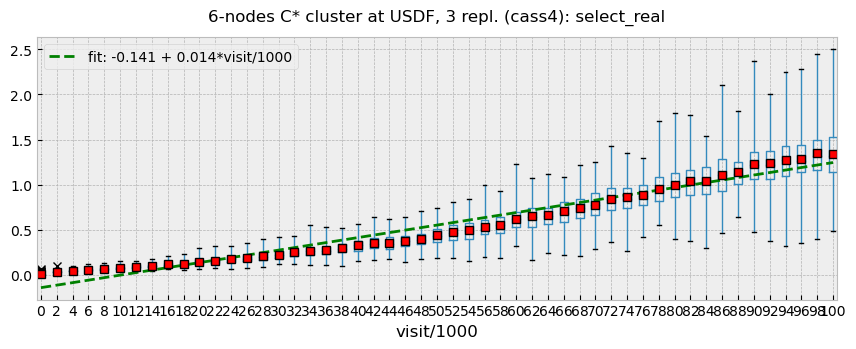

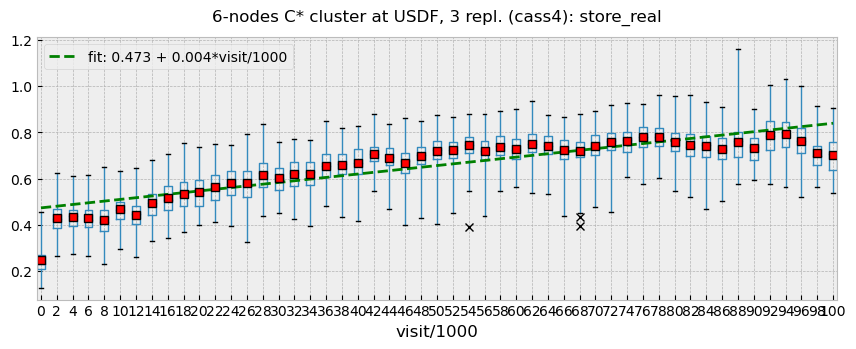

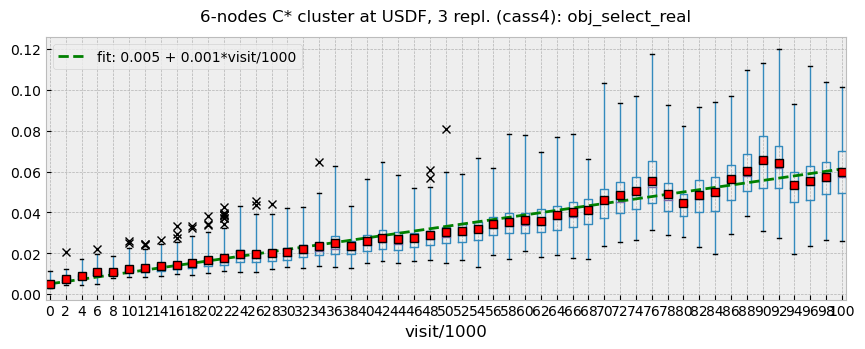

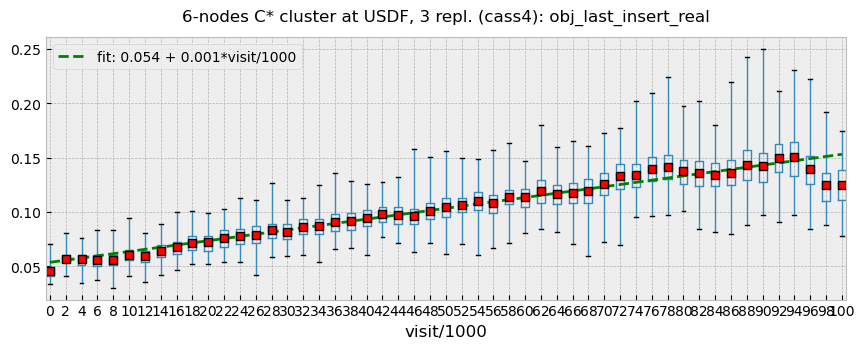

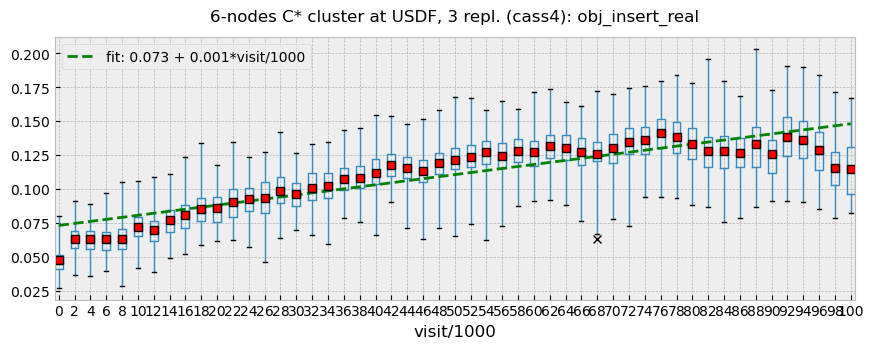

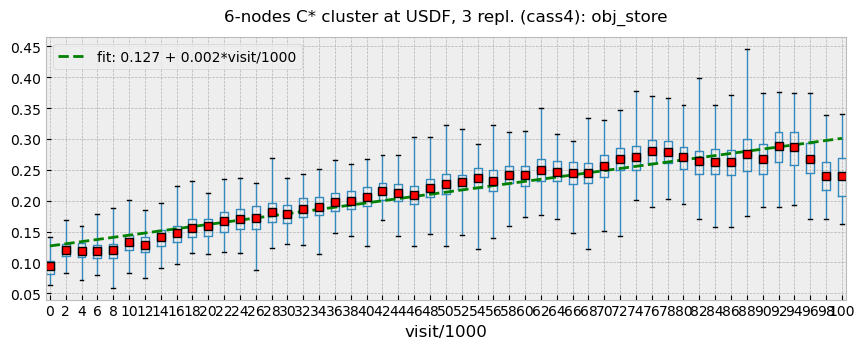

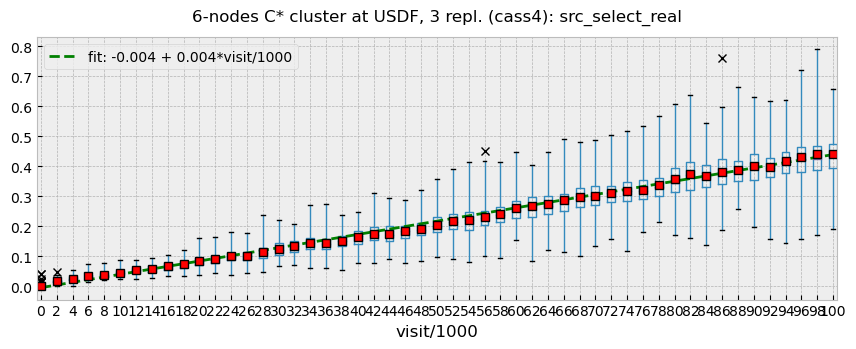

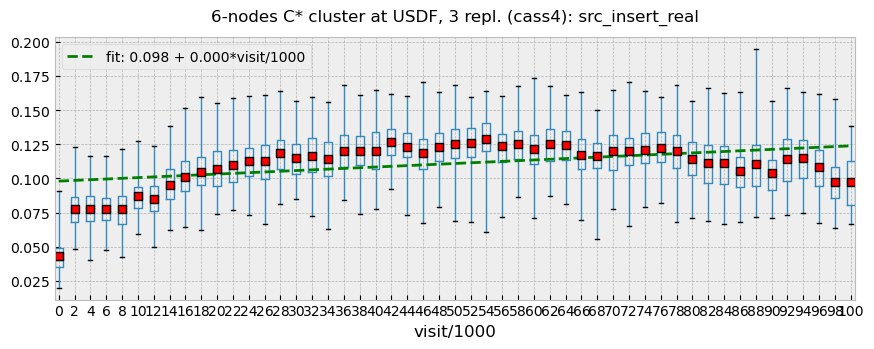

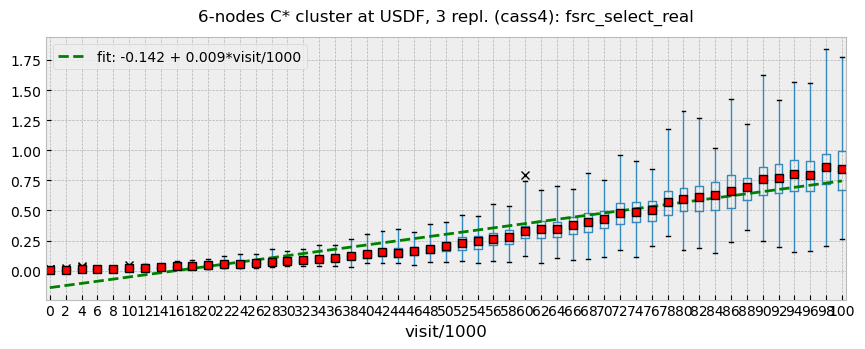

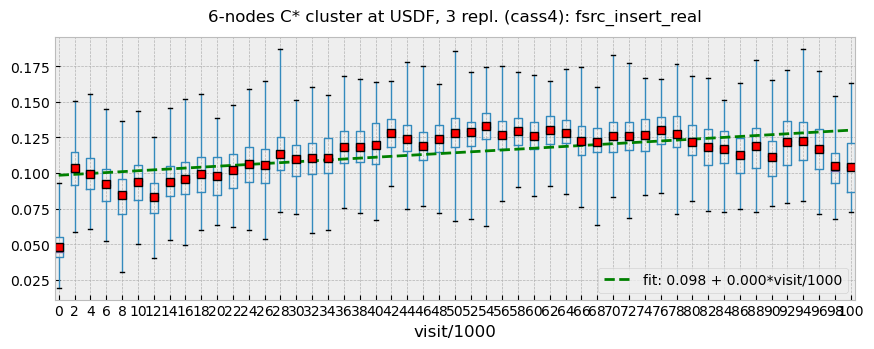

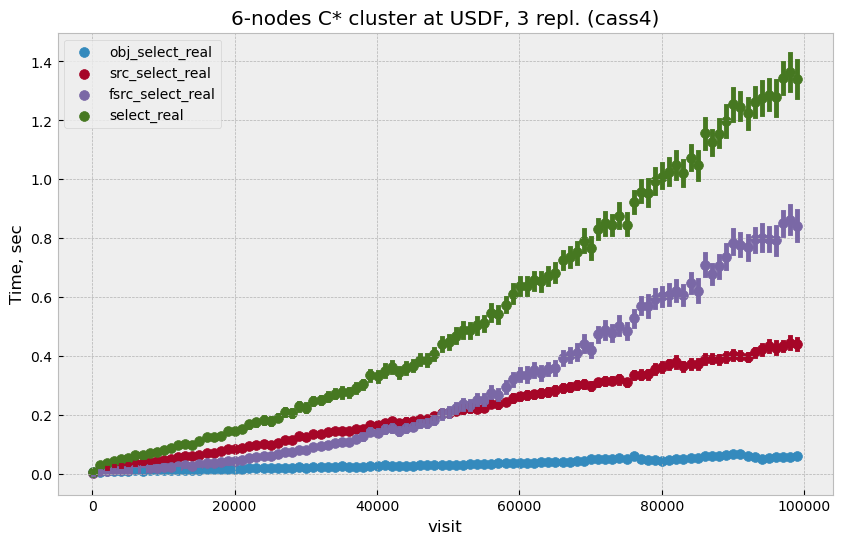

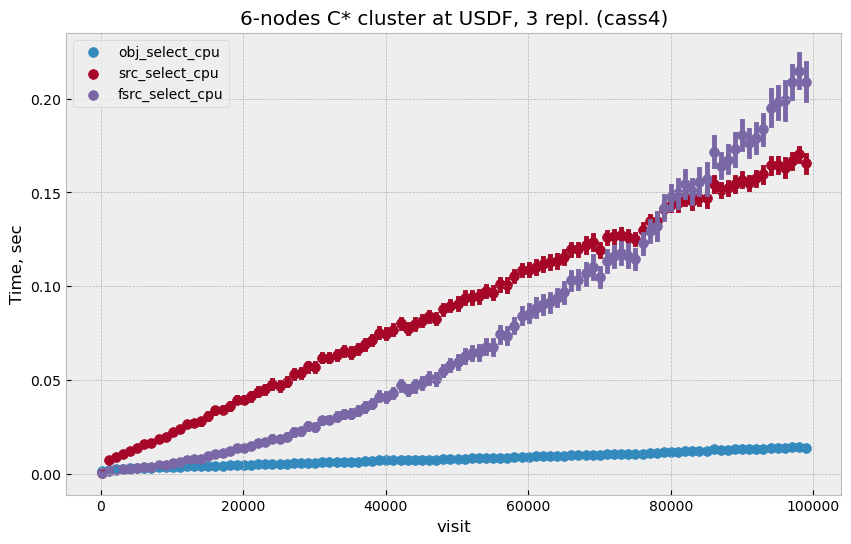

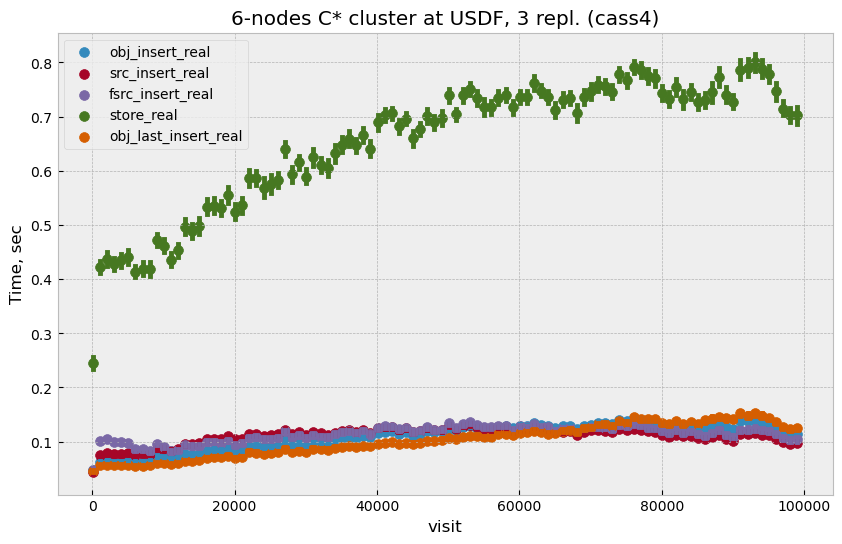

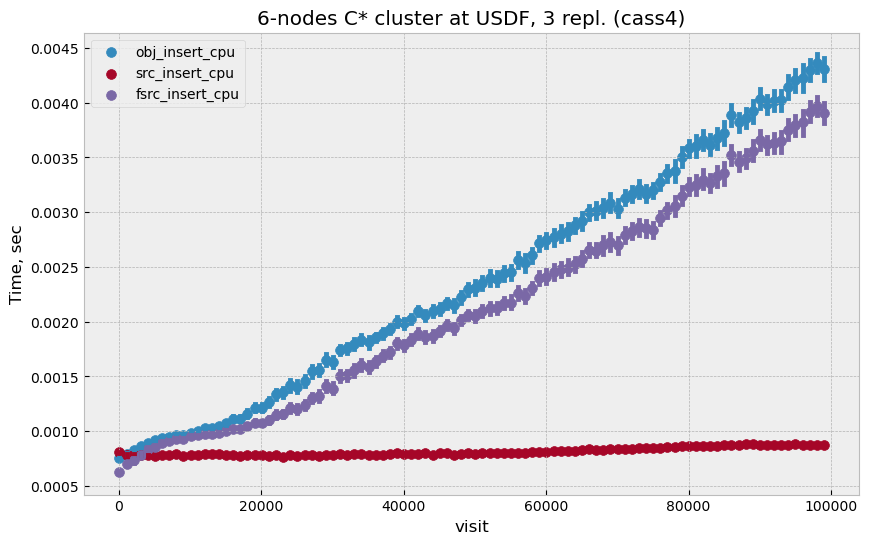

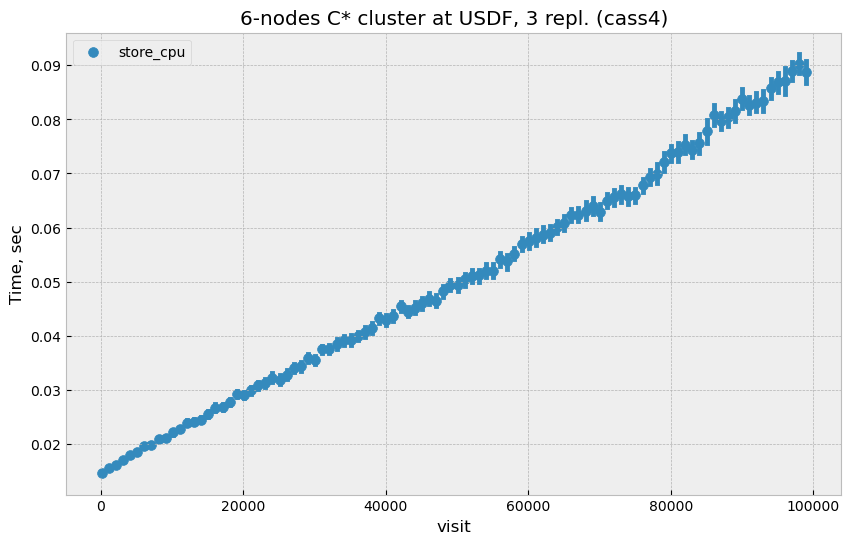

In [17]:
fit_modes = dict(
    store_real=None,
    obj_last_insert_real=None,
    src_insert_real=None,
    fsrc_insert_real=None,
    obj_insert_real=None,
    src_insert_cpu=None,
    fsrc_insert_cpu=None,
    obj_insert_cpu=None,
    store_cpu=None,
)

title = "6-nodes C* cluster at USDF, 3 repl. (cass4)"
plots.do_plots_all(df, title, bin=2000, plots=all_plots, whis=whiskers, fit_mode=None, fit_nbins=100);